## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
users = df['user_id'].nunique()
users

290584

d. The proportion of users converted.

In [6]:
converted = df['user_id'][(df.converted == True)].nunique()
prop_conv = converted/users
print(prop_conv)

0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#count control in group if new_page in landing_page column. count treatment in group if old_page in landing_page column
#sum them 
count_to = df[(df.group == 'treatment') & (df.landing_page == 'old_page')].count()
count_cn = df[(df.group == 'control') & (df.landing_page == 'new_page')].count()
dont_line_up = count_to['group'] + count_cn['group']


dont_line_up

3893

f. Do any of the rows have missing values?

In [8]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df  #new dataframe df2 based on original

In [10]:
df2 = df2.drop(df2[(df2.group == 'treatment') & (df2.landing_page == 'old_page')].index) #drop no align treatment

In [11]:
df2 = df2.drop(df2[(df2.group == 'control') & (df2.landing_page == 'new_page')].index) #drop no align control

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2.user_id.value_counts().loc[lambda x: x>1].index

Int64Index([773192], dtype='int64')

c. What is the row information for the repeat **user_id**? 

In [15]:
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop([1899]) #drop 1899
df2.loc[df2['user_id'] == 773192] #check if dropped

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#Divide number of converted with all users
users2 = df2['user_id'].nunique()
converted2 = df['user_id'][(df.converted == True)].nunique()

prop_conv2 =  converted2/users2 
prop_conv2

0.12104245244060237

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2['converted'][df2.group == 'control'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2['converted'][df2.group == 'treatment'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
#Divide number of cases where landing_page is new_page with all users.
df2['user_id'][df2.landing_page == 'new_page'].nunique() / users2

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

***The conversation rate for control group is about 12.0% and for the treatment group 11.9%. This does not give enough evidence to state that the new pagehas a significantly higher convertion rate, rather it performs equally to the old page. Portion of visitors to each page was approximately 50% so it can be considered a fair judgement. I would suggest to continue exploring the other columns in the dataset to see if for example time of visit affected the convertion rate. Based on the result from the. view created in the cells above there is not enough evidence to reject the old page, yet if there is a wish to change, because you want to, there is nothing from this test showing it would result in drop of convertion. Maybe flip a coin if you have a hard time to chose to stay or go ;)***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

***H0 (Null) = P.old >= P.new***<br>
***H1 (Alternative)= P.old < P.new***<br>
***Old version is equal or better than the new one.***


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
convert_rate = df2['converted'].mean() 
convert_rate

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
convert_rate

0.11959708724499628

c. What is $n_{new}$?

In [23]:
#all users that received the new page
new_count = df2['user_id'][df2.landing_page == 'new_page'].count()
new_count

145310

d. What is $n_{old}$?

In [24]:
#all users that received the old page
old_count = df2['user_id'][df2.landing_page == 'old_page'].count()
old_count

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(1, convert_rate, new_count)
p_new = new_page_converted.mean()
p_new

0.11992292340513386

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1, convert_rate, old_count)
p_old = old_page_converted.mean()
p_old

0.11880997287883585

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# pnew - pold means calculating obs_diff - gotten from case study
# Create dataframe with all control records
old_df2 = df2.query('landing_page == "old_page"')

# Compute completion rate
p_old = old_df2['converted'].mean()

# Create dataframe with all experiment records
new_df2 = df2.query('landing_page == "new_page"')

# Compute completion rate
p_new = new_df2['converted'].mean()

# Compute observed difference in completion rates
obs_diff = p_new - p_old

# Display observed difference in completion rates
obs_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = []
new_converted_simulation = np.random.binomial(new_count, p_new, 10000)/new_count
old_converted_simulation = np.random.binomial(old_count,p_old, 10000)/old_count
p_diffs = new_converted_simulation - old_converted_simulation  

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

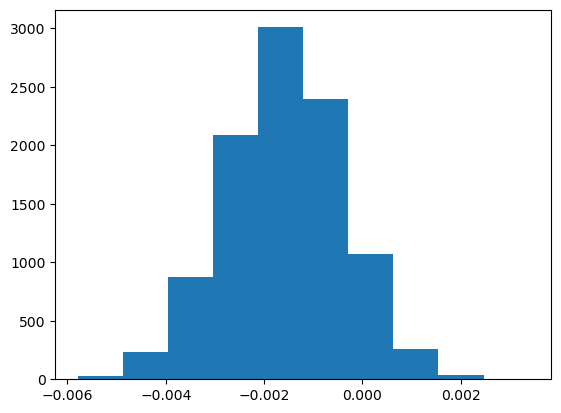

In [29]:
p_diffs = np.array(p_diffs) 
plt.hist(p_diffs); #not distributed under the null therefore, see next cell

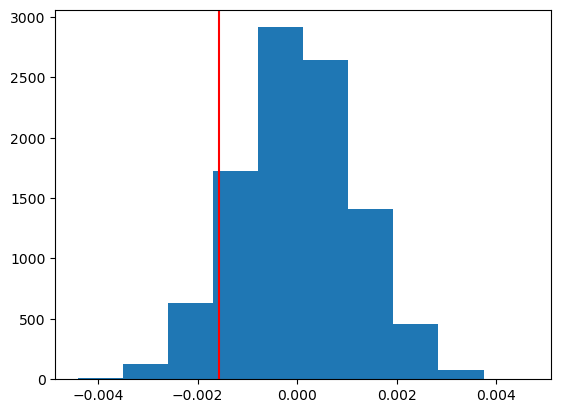

In [30]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size) 

#plot null distribution for p_diffs
plt.hist(null_vals);

#plot line for observed diffs
plt.axvline(obs_diff, c='red'); #expected -0.0015 - yes

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# compute p value
(null_vals > obs_diff).mean()

0.9101

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***The p-value, a number between 0 and 1, is the probability which shows the chance of observing a specific statistic data. With the p-value we can see if the null is in favor of the alternative. A p-value higher than 0.05 (5%) which is a threshold for Type 1 error, means that we fail to reject the null. 0.9 is far over 0.05 which indicate we should not accept the alternative. Because the p-value is large, we have evidence that our statistic was likely to not come from the null hypothesis. Therefore, we do not have evidence to reject the null.*** 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
#using this input page instead of yours (which led to a 404)
#https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest

z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[old_count,new_count], alternative='smaller')

print(z_score, p_value)


1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

***Answer found here: https://statisticsbyjim.com/basics/z-score/
"A z-score measures the distance between a data point and the mean using standard deviations. Z-scores can be positive or negative. The sign tells you whether the observation is above or below the mean."***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

***Logistic regression, because we will compare an either or situation***

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df3 = df2 
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
import statsmodels.api as sm

#dummy variables
df3['ab_page'] = pd.get_dummies(df['group'])['treatment']
df3[['notconverted', 'converted']]= pd.get_dummies(df['converted'])
df3=df3.drop('notconverted', axis=1)

df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [36]:
#intercept add
df3['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 448.424145
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                     inf
Time:                        19:28:53   Log-Likelihood:            -1.3030e+08
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [39]:
#to exponentiate
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.9851119396030626)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

***AB page p-value is 0.190. A logistic regression test only compare two options - if they are equal or not. Written as an hypothese test it should be described as Null being equal to zero and the Alternative being different (not equal) to zero. In Part II the test had an directo to look at if Null was being equal or larger than zero and the Alternative being less than zero.***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

***The result from both tests show quite equal spread even though the regression show to go for the new page. Adding other factors can bring more clarity but than one need to look out for multicollinearity, which means several independent variables (x) in a model are correlated.***

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [57]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [60]:
# Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
#df_new = df_new.join(country_dummies)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1


In [63]:
# Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
logit_m = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']]) 
results = logit_m.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 448.436079
         Iterations 6


/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                     inf
Time:                        19:45:19   Log-Likelihood:            -1.3031e+08
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [64]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
#Additional columns
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']


df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US,UK,CA_ab_page,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1,0


In [67]:
#fit the new model 
df_new['intercept'] = 1
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US' , 'UK_ab_page', 'US_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 448.445345
         Iterations 6


/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/bealundgren/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                     inf
Time:                        19:46:10   Log-Likelihood:            -1.3031e+08
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

***The logistic regression shows that there are no significant difference between the old page or new page even when adding the country factor, only the intercept has a p value of zero indicating that country origin is not a significant factor for predicting higher convertion. To sum up, the p-values do not provide a statistical basis to reject the null hypothesis, based on previously mentioned that it needs to fall under the Type 1 error rate of 5% to reject the alternative instead. 
So from all of the computed tests done here there are no evidence in favor of the alternative. Yet, in practice there might be business requirements driving towards chosing the alternative. If that is the case, there is really nothing in these tests that statistically shows it would be a notable loss in convertions. Yet, considering all test performed it seems the old page is being more converted into and therefor wins the battle.*** 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.